<a href="https://colab.research.google.com/github/renuchaurasia/renu_INFO5731_Spring2023/blob/main/Assignment/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests
from IPython.display import display

df_walmart_product_review = pd.read_csv('Walmart_product_review.csv')
df_walmart_product_review.columns = ['product_name', 'reviewer', 'review_date', 'review_text']

df_walmart_product_review




,product_name,reviewer,review_date,review_text
0,Melrose Ave Women s Faux Leather Crossband Sli...,HilC,3/3/2022,These sandals look just like the picture! Grea...
1,Melrose Ave Women s Faux Leather Crossband Sli...,Jojo,3/3/2022,"These slides feel great on and they look nice,..."
2,Melrose Ave Women s Faux Leather Crossband Sli...,MaryjoB02,3/3/2022,"Fit is great: comfortable, no catching of toes..."
3,Melrose Ave Women s Faux Leather Crossband Sli...,Karenc,3/3/2022,"These sandals are so pretty, so comfortable an..."
4,Melrose Ave Women s Faux Leather Crossband Sli...,Cocochies,3/6/2022,Melrose Ave Vegan Leather Crossband Slide Sand...
...,...,...,...,...
1104,Sony Cyber shot DSC W800 Digital Camera Black ...,ekim,12/28/2014,Great size and Quality
1105,Sony Cyber shot DSC W800 Digital Camera Black ...,NaN,9/26/2014,Had great photos and video while it lasted. Go...
1106,Sony Cyber shot DSC W800 Digital Camera Black ...,Ski100,12/9/2014,None
1107,Sony Cyber shot DSC W800 Digital Camera Black ...,teconn,12/29/2014,Did what I expected it to do.


In [ ]:
def generate_ngrams(text, n):

    ngrams = []
    words = text.split()
    for i in range(len(words)-(n-1)):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

In [ ]:
def count_ngrams(ngrams):

    ngram_freq = {}
    for ngram in ngrams:
        if ngram in ngram_freq:
            ngram_freq[ngram] += 1
        else:
            ngram_freq[ngram] = 1
    return ngram_freq

In [ ]:
#Removing noise, such as special characters and punctuations.
df_walmart_product_review['review_text_cln'] = df_walmart_product_review['review_text'].str.replace('[^\w\s]','')


#Remove numbers
df_walmart_product_review['review_text_cln'] = df_walmart_product_review['review_text_cln'].str.replace('\d+', '').astype(str)

#Removing stopwords
from nltk.corpus import stopwords

stop = stopwords.words('english')
df_walmart_product_review['review_text_cln'] = df_walmart_product_review['review_text_cln'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_walmart_product_review['review_text_cln'].head()

#Lower case
df_walmart_product_review['review_text_cln'] = df_walmart_product_review['review_text_cln'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_walmart_product_review['review_text_cln'].head()

c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    these sandals look like picture great hotter m...
1    these slides feel great look nice i really lov...
2    fit great comfortable catching toes padded foo...
3    these sandals pretty comfortable fit perfectly...
4    melrose ave vegan leather crossband slide sand...
Name: review_text_cln, dtype: object

In [ ]:
dataset = ' '.join(df_walmart_product_review['review_text_cln'].tolist())

In [ ]:
# (1) Count the frequency of all the N-grams (N=3).
n = 3
ngrams = generate_ngrams(dataset, n)
ngram_freq = count_ngrams(ngrams)
# Displaying the results
print("Frequency of", n, "-grams:")
for ngram, freq in ngram_freq.items():
    print(ngram, ":", freq)

Frequency of 3 -grams:
these sandals look : 1
sandals look like : 1
look like picture : 1
like picture great : 1
picture great hotter : 1
great hotter months : 1
hotter months a : 1
months a slight : 1
a slight padding : 1
slight padding bottom : 1
padding bottom i : 1
bottom i higher : 1
i higher average : 1
higher average arch : 1
average arch top : 1
arch top foot : 1
top foot rubbed : 1
foot rubbed onto : 1
rubbed onto straps : 1
onto straps bit : 1
straps bit much : 1
bit much liking : 1
much liking im : 1
liking im thinking : 1
im thinking dont : 1
thinking dont high : 1
dont high arch : 1
high arch rubbing : 1
arch rubbing might : 1
rubbing might happen : 1
might happen still : 1
happen still love : 1
still love though : 1
love though these : 1
though these slides : 1
these slides feel : 1
slides feel great : 1
feel great look : 1
great look nice : 1
look nice i : 1
nice i really : 1
i really love : 1
really love green : 1
love green color : 2
green color goes : 1
color goes pre

In [ ]:
# (2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). 
# For example, count(really like) / count(really) = 1 / 3 = 0.33.

def generate_bigrams(text):

    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    return bigrams


def calculate_bigram_probabilities(bigrams):

    bigram_freq = {}
    unigram_freq = {}
    
    # Count the frequencies of bigrams and unigrams
    for bigram in bigrams:
        if bigram in bigram_freq:
            bigram_freq[bigram] += 1
        else:
            bigram_freq[bigram] = 1
        
        if bigram[0] in unigram_freq:
            unigram_freq[bigram[0]] += 1
        else:
            unigram_freq[bigram[0]] = 1
    
     # Calculate the probabilities for bigrams
    bigram_prob = {}
    for bigram in bigram_freq:
        w2_w1_count = bigram_freq[bigram]
        w2_count = unigram_freq[bigram[0]]
        bigram_prob[bigram] = w2_w1_count / w2_count
    
    return bigram_prob

In [ ]:
# Bigram analysis
bigrams = generate_bigrams(dataset)
bigram_prob = calculate_bigram_probabilities(bigrams)

# Displaying the results
print("Probabilities for all the bigrams:")
for bigram, prob in bigram_prob.items():
    print(bigram[0], bigram[1], ":", prob)

Probabilities for all the bigrams:
these sandals : 0.1
sandals look : 0.1111111111111111
look like : 0.30434782608695654
like picture : 0.0058823529411764705
picture great : 0.05217391304347826
great hotter : 0.0033222591362126247
hotter months : 1.0
months a : 0.058823529411764705
a slight : 0.034482758620689655
slight padding : 0.3333333333333333
padding bottom : 0.3333333333333333
bottom i : 0.16666666666666666
i higher : 0.0006414368184733803
higher average : 0.0625
average arch : 0.5
arch top : 0.5
top foot : 0.009900990099009901
foot rubbed : 0.1
rubbed onto : 1.0
onto straps : 0.3333333333333333
straps bit : 0.5
bit much : 0.03225806451612903
much liking : 0.015151515151515152
liking im : 1.0
im thinking : 0.009900990099009901
thinking dont : 0.25
dont high : 0.013513513513513514
high arch : 0.02564102564102564
arch rubbing : 0.5
rubbing might : 1.0
might happen : 0.1111111111111111
happen still : 0.25
still love : 0.018867924528301886
love though : 0.0058823529411764705
though 

In [ ]:
# (3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews 
# (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. 
# Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 

import pandas as pd
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def extract_noun_phrases(text):

    noun_phrases = []
    pos_tags = pos_tag(word_tokenize(text))
    current_noun_phrase = []
    for word, pos in pos_tags:
        if pos.startswith('NN'):  # Check if the word has a noun part of speech tag
            current_noun_phrase.append(word)
        else:
            if current_noun_phrase:
                noun_phrases.append(' '.join(current_noun_phrase))
                current_noun_phrase = []
    if current_noun_phrase:
        noun_phrases.append(' '.join(current_noun_phrase))
    return noun_phrases

def calculate_noun_phrase_probabilities(noun_phrases):

    noun_phrase_freq = {}
    
    # Count the frequencies of noun phrases
    for noun_phrase in noun_phrases:
        if noun_phrase in noun_phrase_freq:
            noun_phrase_freq[noun_phrase] += 1
        else:
            noun_phrase_freq[noun_phrase] = 1
    
    # Calculate the relative probabilities of noun phrases
    max_freq = max(noun_phrase_freq.values()) if noun_phrase_freq else 1  # Check if the list is empty
    noun_phrase_prob = {}
    for noun_phrase in noun_phrase_freq:
        noun_phrase_prob[noun_phrase] = noun_phrase_freq[noun_phrase] / max_freq
    
    return noun_phrase_prob


In [ ]:
# Extract noun phrases and calculate their relative probabilities for each review
review_noun_phrases = {}
for i, text in enumerate(df_walmart_product_review['review_text_cln']):
    noun_phrases = extract_noun_phrases(text)
    noun_phrase_prob = calculate_noun_phrase_probabilities(noun_phrases)
    review_noun_phrases[f'Review {i+1}'] = noun_phrase_prob

# Create a dataframe to display the results
df_results = pd.DataFrame(review_noun_phrases)
df_results.fillna(0, inplace=True)  # Replace NaN with 0 for reviews with no noun phrases
df_results.index.name = 'Review'
df_results.columns.name = 'Noun Phrase'

# Display the results
print("Relative Probabilities of Noun Phrases for Each Review:")
print(df_results)

Relative Probabilities of Noun Phrases for Each Review:
Noun Phrase       Review 1  Review 2  Review 3  Review 4  Review 5  Review 6  \
Review                                                                         
sandals                1.0       0.0       0.0       1.0       0.0       0.0   
picture                1.0       0.0       0.0       0.0       0.0       0.0   
months                 1.0       0.0       0.0       0.0       0.0       0.0   
padding bottom i       1.0       0.0       0.0       0.0       0.0       0.0   
foot                   1.0       0.0       0.0       0.0       0.0       0.0   
...                    ...       ...       ...       ...       ...       ...   
photography fun        0.0       0.0       0.0       0.0       0.0       0.0   
simple use             0.0       0.0       0.0       0.0       0.0       0.0   
everything works       0.0       0.0       0.0       0.0       0.0       0.0   
windows                0.0       0.0       0.0       0.0       0

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Apply the vectorizer on the text data to calculate the tf-idf weights
tfidf_matrix = vectorizer.fit_transform(df_walmart_product_review['review_text_cln'])

# Convert the tf-idf matrix to a dataframe
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the tf-idf matrix
print("Documents-Terms Weights (tf-idf) Matrix:")
print(df_tfidf)



Documents-Terms Weights (tf-idf) Matrix:
      ability  abit  able  about  abrasive  absence  absolute  absolutely  \
0         0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
1         0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
2         0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
3         0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
4         0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
...       ...   ...   ...    ...       ...      ...       ...         ...   
1104      0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
1105      0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
1106      0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
1107      0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   
1108      0.0   0.0   0.0    0.0       0.0      0.0       0.0         0.0   

       ac  accent  ...   âœ  âœhom

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Apply the vectorizer on the text data to calculate the tf-idf weights
tfidf_matrix = vectorizer.fit_transform(df_walmart_product_review['review_text_cln'])

# Convert the query into a tf-idf vector
query = "An Outstanding movie with a haunting performance and best character development"
query_vector = vectorizer.transform([query])

# Calculate cosine similarity between the query vector and all document vectors
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)

# Extract the similarity scores for the query with each document
similarity_scores = cosine_similarities.flatten()

# Create a dataframe with document index and corresponding similarity scores
df_similarity = pd.DataFrame({'Document': df_walmart_product_review.index, 'Similarity': similarity_scores})

# Sort the documents based on similarity scores in descending order
df_similarity = df_similarity.sort_values(by='Similarity', ascending=False)

# Display the ranked documents
print("Ranked Documents based on Cosine Similarity with the Query:")
print(df_similarity)


Ranked Documents based on Cosine Similarity with the Query:
      Document  Similarity
461        461    0.340123
1085      1085    0.224480
471        471    0.210673
892        892    0.175705
418        418    0.168721
...        ...         ...
383        383    0.000000
384        384    0.000000
385        385    0.000000
386        386    0.000000
1108      1108    0.000000

[1109 rows x 2 columns]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
from gensim.models import Word2Vec
import pandas as pd



# Convert the text data into a list of sentences
sentences = [sentence.split() for sentence in df_walmart_product_review['review_text_cln']]

# Train a Word2Vec model on the list of sentences
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the trained Word2Vec model
model.save('word2vec_model.bin')  # Replace 'word2vec_model.bin' with the desired filename and path


c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


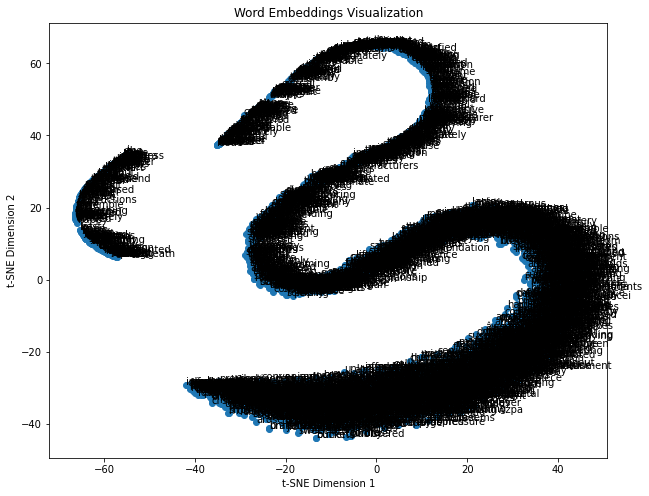

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the trained Word2Vec model
model = Word2Vec.load('word2vec_model.bin')  # Replace 'word2vec_model.bin' with the path to your trained model

# Get the vocabulary of the model
vocabulary = list(model.wv.key_to_index.keys())

# Extract word embeddings from the vocabulary
embeddings = model.wv[vocabulary]

# Use t-SNE to reduce the dimensionality of the word embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the word embeddings in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')
for i, word in enumerate(vocabulary):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [1]:
# The GitHub link of your final csv file

# https://github.com/renuchaurasia/renu_INFO5731_Spring2023/blob/main/Assignment/Walmart_sentiment.csv

